In [1]:
# Importing pandas, numpy, matplotlib.pyplot and datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
tfl = pd.read_csv('tfl-daily-cycle-hires.csv')

In [3]:
tfl

,Day,Number of Bicycle Hires,Unnamed: 2
0,30/07/2010,6897.0,NaN
1,31/07/2010,5564.0,NaN
2,01/08/2010,4303.0,NaN
3,02/08/2010,6642.0,NaN
4,03/08/2010,7966.0,NaN
...,...,...,...
4076,26/09/2021,45120.0,NaN
4077,27/09/2021,32167.0,NaN
4078,28/09/2021,32539.0,NaN
4079,29/09/2021,39889.0,NaN


In [4]:
tfl.dtypes

Day                         object
Number of Bicycle Hires    float64
Unnamed: 2                 float64
dtype: object

In [5]:
# Changing 'Day' to be datetime dtype, 'Number of Bicycle Hires' as string
# Dropping columns 'Unnamed: 2'
tfl['Day'] = pd.to_datetime(tfl['Day'], format='%d/%m/%Y')
tfl['Number of Bicycle Hires'] = tfl['Number of Bicycle Hires'].astype('float')
tfl.drop(columns='Unnamed: 2', inplace=True)

In [6]:
tfl.dtypes

Day                        datetime64[ns]
Number of Bicycle Hires           float64
dtype: object

In [7]:
tfl

,Day,Number of Bicycle Hires
0,2010-07-30,6897.0
1,2010-07-31,5564.0
2,2010-08-01,4303.0
3,2010-08-02,6642.0
4,2010-08-03,7966.0
...,...,...
4076,2021-09-26,45120.0
4077,2021-09-27,32167.0
4078,2021-09-28,32539.0
4079,2021-09-29,39889.0


In [8]:
# Sorting values by 'Day' ascending
tfl.sort_values('Day', ascending = True, inplace =True)

In [9]:
# Creating additional columns
tfl['Day of Week'] = tfl['Day'].dt.strftime('%A')
tfl['Month'] = tfl['Day'].dt.strftime('%B')
tfl['Day Number'] = tfl['Day'].dt.strftime('%w')
tfl['Month Number'] = tfl['Day'].dt.strftime('%m')

In [10]:
tfl

,Day,Number of Bicycle Hires,Day of Week,Month,Day Number,Month Number
0,2010-07-30,6897.0,Friday,July,5,07
1,2010-07-31,5564.0,Saturday,July,6,07
2,2010-08-01,4303.0,Sunday,August,0,08
3,2010-08-02,6642.0,Monday,August,1,08
4,2010-08-03,7966.0,Tuesday,August,2,08
...,...,...,...,...,...,...
4076,2021-09-26,45120.0,Sunday,September,0,09
4077,2021-09-27,32167.0,Monday,September,1,09
4078,2021-09-28,32539.0,Tuesday,September,2,09
4079,2021-09-29,39889.0,Wednesday,September,3,09


In [11]:
# Creating new data frame to show the Number of Bicycle Hires by Day trend
tfl_day = tfl[['Day of Week', 'Day Number','Number of Bicycle Hires']].groupby(by=['Day of Week','Day Number']).sum()

In [12]:
# Resetting index and returning 'Day of Week' and 'Day Number' as columns
tfl_day.reset_index(inplace=True)

In [13]:
# Sorting via the 'Day Number' column
tfl_day.sort_values('Day Number', inplace=True)

In [14]:
# New column showing the 'Number of Bicycle Hires (millions)'
tfl_day['Number of Bicycle Hires (millions)'] = round(tfl_day['Number of Bicycle Hires']/1000000,2)

In [15]:
# Dropping the 'Number of Bicycle Hires' column
tfl_day.drop(columns='Number of Bicycle Hires', inplace=True)

In [16]:
tfl_day

,Day of Week,Day Number,Number of Bicycle Hires (millions)
3,Sunday,0,13.01
1,Monday,1,15.21
5,Tuesday,2,16.38
6,Wednesday,3,16.43
4,Thursday,4,16.37
0,Friday,5,15.79
2,Saturday,6,13.99


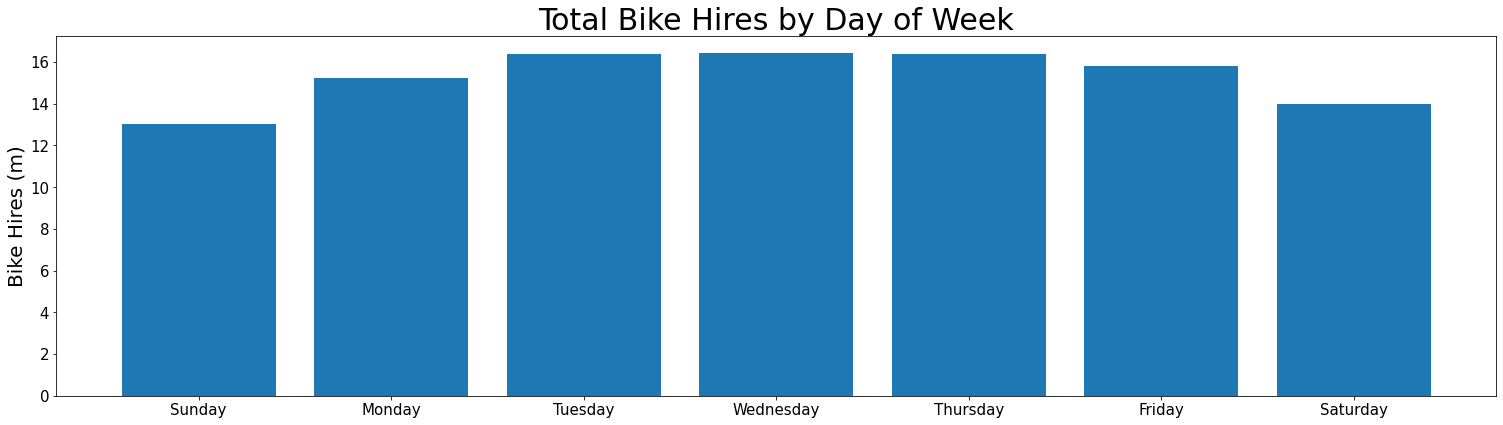

In [17]:
# create visualization with matplotlib
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])

axes.bar(x='Day of Week', height='Number of Bicycle Hires (millions)', data=tfl_day)

axes.set_title('Total Bike Hires by Day of Week', fontsize=30)
axes.set_ylabel('Bike Hires (m)', fontsize = 20)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

In [18]:
# Creating new DataFrame to show the Number of Bicycle Hires by month trend
tfl_month = tfl[['Month', 'Month Number','Number of Bicycle Hires']].groupby(by=['Month','Month Number']).sum()

In [19]:
# Resetting index and returning 'Month of Week' and 'Month Number' as columns
tfl_month.reset_index(inplace=True)

In [20]:
# Sorting via the 'Month Number' column
tfl_month.sort_values('Month Number', inplace=True)

In [21]:
# New column showing the 'Number of Bicycle Hires (millions)'
tfl_month['Number of Bicycle Hires (millions)'] = round(tfl_month['Number of Bicycle Hires']/1000000,2)

In [22]:
# Dropping the 'Number of Bicycle Hires' column
tfl_month.drop(columns='Number of Bicycle Hires', inplace=True)

In [23]:
tfl_month

,Month,Month Number,Number of Bicycle Hires (millions)
4,January,01,6.22
3,February,02,6.11
7,March,03,7.52
0,April,04,8.56
8,May,05,10.36
6,June,06,10.99
5,July,07,12.12
1,August,08,11.68
11,September,09,11.22
10,October,10,9.17


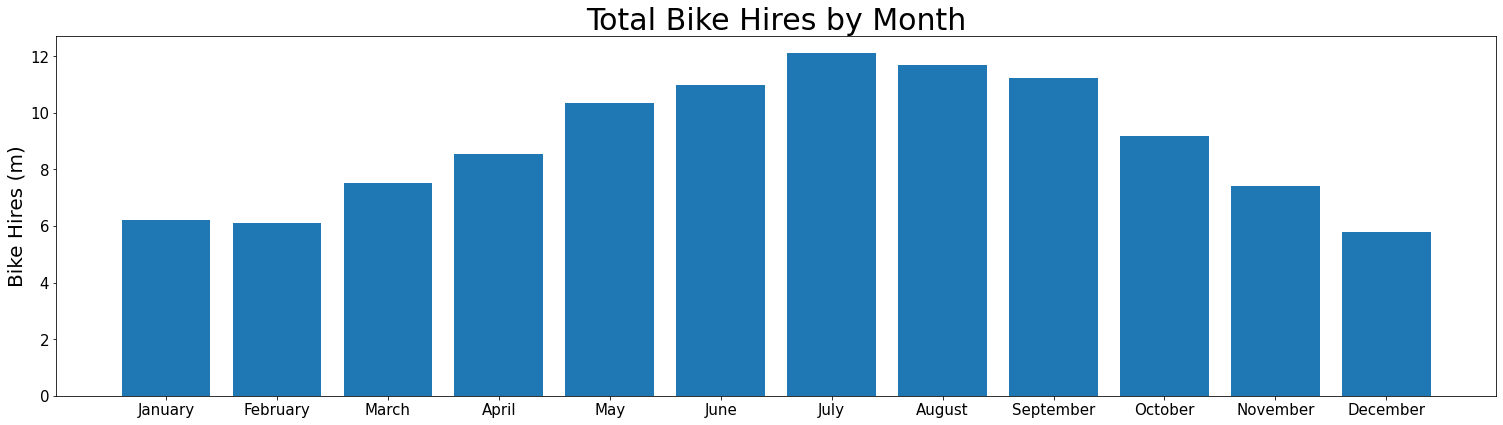

In [24]:
# create visualization with matplotlib
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])

axes.bar(x='Month', height='Number of Bicycle Hires (millions)', data=tfl_month)

axes.set_title('Total Bike Hires by Month', fontsize=30)
axes.set_ylabel('Bike Hires (m)', fontsize = 20)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()